# 2. Data Cleaning
- Manual cleaning of low-quality images

In [1]:
# pip install torch torchvision torchaudio # (For CPU)
import torch                                        # root package
from torch.utils.data import Dataset, DataLoader    # dataset representation and loading
from torchvision import datasets, models, transforms     # vision datasets,architectures & transforms
import torchvision.transforms as transforms              # composable transforms
torch.manual_seed(17)

import os
from pathlib import Path
from glob import glob
import random
import shutil

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
import json
from datetime import datetime as dt

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
# Create new directory to store cleaned images (copy raw data)
CLEAN_DATA_FOLDER = 'data/1_clean'
TRAIN_DATA = f'{CLEAN_DATA_FOLDER}/train'
VALID_DATA = f'{CLEAN_DATA_FOLDER}/val'

try:
    shutil.copytree('data/0_raw', CLEAN_DATA_FOLDER, dirs_exist_ok=False)
    print('Created new folder')
except:
    print('Folder already exists')

Created new folder


In [3]:
# # Rename all files in train and val sets (in clean folder) for easier cleaning
data_types = [TRAIN_DATA, VALID_DATA]

for data_type in data_types:
    for folder in os.listdir(data_type):
          for index, file in enumerate(os.listdir(data_type + '/' + folder)):
                os.rename(os.path.join(data_type, folder, file), os.path.join(data_type, folder, ''.join([str(folder), '_', str(index),'.png'])))

In [195]:
# Setup function to display random images based on a label (for manual review) - Includes both train and valid
def show_images(label, num):
    images = []
    labels = []
    filenames = []

    # Add train data images
    data_folders = [TRAIN_DATA, VALID_DATA]
    
    for data_folder in data_folders:
        for folder in os.listdir(data_folder):
              for image in os.listdir(data_folder + '/' + label):
                images.append(os.path.join(data_folder, label, image))
                if data_folder == TRAIN_DATA:
                    filenames.append(f'train/{label}/{image}')
                else:
                    filenames.append(f'val/{label}/{image}')

    plt.figure(1, figsize=(18, 11))
    plt.axis('off')
    n = 0

    for i in range(num):
        n += 1
        random_index = random.choice(range(len(images)))
        random_filename = filenames[random_index]
        random_img = images[random_index]
        img = cv2.imread(random_img, cv2.IMREAD_GRAYSCALE)
        plt.subplot(np.sqrt(num), np.sqrt(num), n)
        plt.axis('off')
        plt.imshow(img, cmap=plt.get_cmap('gray'))
        random_data_type = random_filename.split('/')[0]
        random_img_name = random_filename.split('/')[-1].split('.')[0]
        plt.title(f'{random_data_type}-{random_img_name}')

    plt.show()

In [47]:
# Setup function to add file into list for deleting later
deleted_imgs = []

def delete_file(data_type, img_name):
    global deleted_imgs 
    label = img_name.split('_')[0]
    file_path = f'{CLEAN_DATA_FOLDER}/{data_type}/{label}/{img_name}.png'
    
    # Add file path to list to track deleted items
    deleted_imgs = deleted_imgs + [file_path]
    
    # Remove duplicates in list
    deleted_imgs = list(dict.fromkeys(deleted_imgs))
    
    # Delete file
    try:
        os.remove(file_path)
        print(f'Successfully deleted {file_path}')
    except:
        pass

In [59]:
# Setup function to move file into another folder
# Datatype = 'train' or 'valid', Imgname (without .png) e.g. 'i_123'
# Arguments should be in this format e.g. 'train', 'i_123', 'iii'

def move_file(data_type, img_name, new_label):
    old_label = img_name.split('_')[0]
    source = f'{CLEAN_DATA_FOLDER}/{data_type}/{old_label}/{img_name}.png'
    dest = f'{CLEAN_DATA_FOLDER}/{data_type}/{new_label}/{img_name}.png'
    
    try:
        shutil.move(source, dest)
        print(f'Successfully moved {source}')
    except:
        pass

In [6]:
# Store image paths and corresponding label and filename (for train set and validation set)
train_images = []
train_label_filenames = []
valid_images = []
valid_label_filenames = []

for folder in os.listdir(TRAIN_DATA):
      for image in os.listdir(TRAIN_DATA + '/' + folder):
        train_images.append(os.path.join(TRAIN_DATA, folder, image))
        train_label_filenames.append(f'{folder}/{image}')

for folder in os.listdir(VALID_DATA):
      for image in os.listdir(VALID_DATA + '/' + folder):
        valid_images.append(os.path.join(VALID_DATA, folder, image))
        valid_label_filenames.append(f'{folder}/{image}')

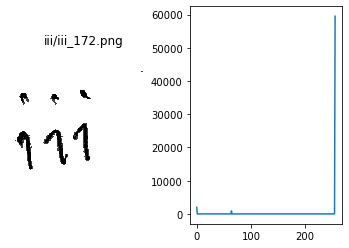

In [7]:
# Get a single random image from train set
random_index = random.choice(range(len(train_images)))
random_img = cv2.imread(train_images[random_index], 0)
# imgplot = plt.imshow(random_img, cmap=plt.get_cmap('gray'))

# calculate frequency of pixels in range 0-255
histg = cv2.calcHist([random_img],[0],None,[256],[0,256]) 

# show the plotting graph of an image
fig, ax = plt.subplots(1,2)
ax[0].axis('off')
ax[0].set_title(train_label_filenames[random_index])

ax[0].imshow(random_img, cmap=plt.get_cmap('gray'));
ax[1].plot(histg);

### Loop through images manually and remove dirty data

### Label i

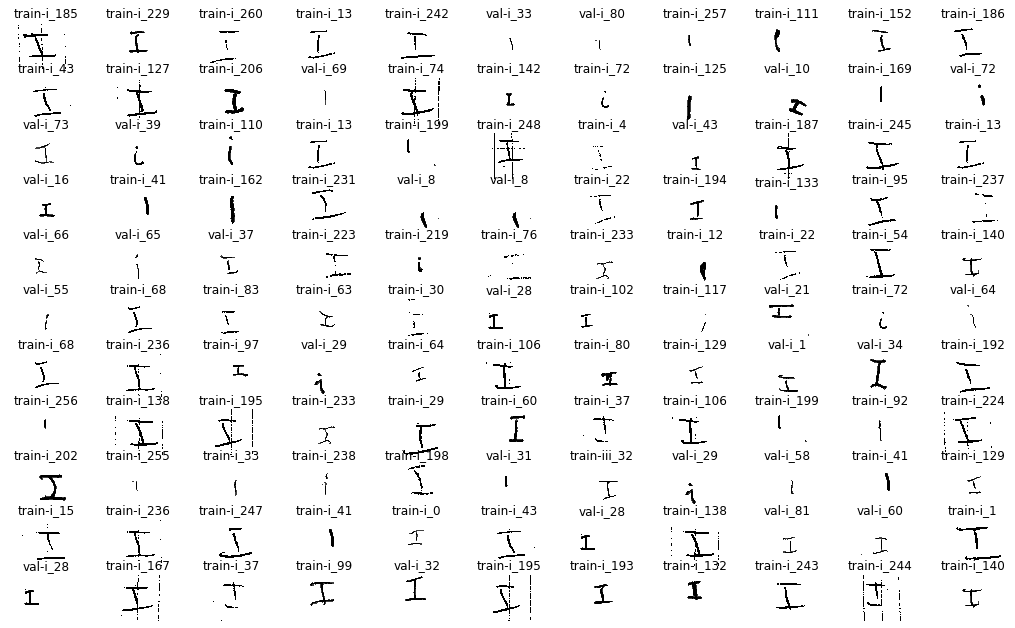

In [445]:
show_images('i', 121)

In [446]:
# Add images to list for discarding
delete_file('train', 'i_7')
delete_file('train', 'i_75')
delete_file('train', 'i_76') # Unclear, few pixels
delete_file('train', 'i_122')
delete_file('train', 'i_126')
delete_file('train', 'i_168')
delete_file('train', 'i_170')
delete_file('train', 'i_188')
delete_file('train', 'i_218')
# delete_file('', '')

Successfully deleted data/1_clean/train/i/i_76.png


In [441]:
# Files to move
move_file('train', 'i_70', 'ii')
move_file('train', 'i_98', 'ii')
move_file('train', 'i_123', 'iii')
move_file('train', 'i_136', 'ii')
move_file('train', 'i_149', 'v')
move_file('train', 'i_166', 'ii')
move_file('train', 'i_211', 'ii')
move_file('train', 'i_212','iii')
move_file('train', 'i_230', 'ii')
move_file('train', 'i_246', 'ii')
move_file('val', 'i_18', 'ii')
# move_file('', '', '')

___
#### Label ii

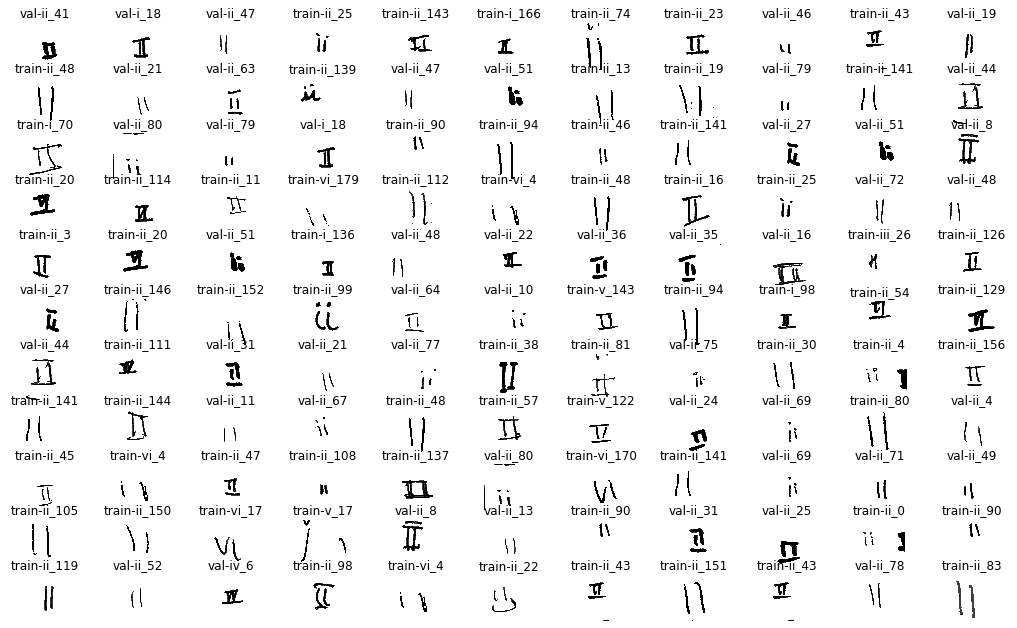

In [421]:
show_images('ii', 121)

In [440]:
delete_file('train', 'ii_10')
delete_file('train', 'ii_22') # Smiley face
delete_file('train', 'ii_56')
delete_file('train', 'ii_63')
delete_file('train', 'ii_68')
# delete_file('', '')

In [438]:
move_file('train', 'ii_44', 'v')
move_file('train', 'ii_51', 'iii')
move_file('train', 'ii_66', 'x')
move_file('train', 'ii_69', 'v')
move_file('train', 'ii_89', 'x')
move_file('train', 'ii_100', 'iii')
move_file('train', 'ii_104', 'i')
move_file('train', 'ii_130', 'x')
# move_file('', '', '')

___
#### Label iii

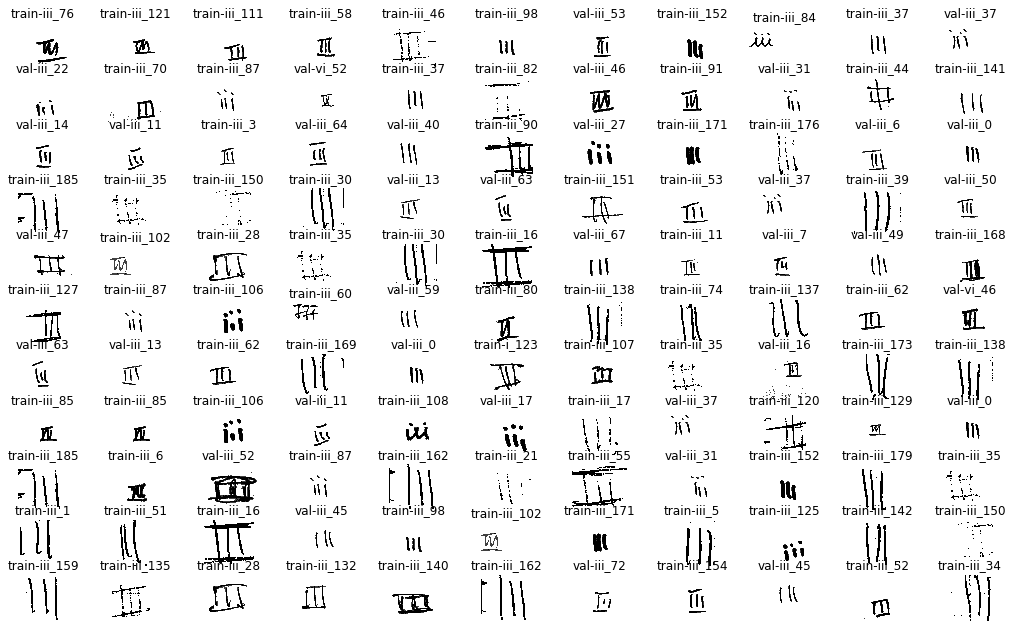

In [449]:
show_images('iii', 121)

In [448]:
delete_file('train', 'iii_0')
delete_file('train', 'iii_2')
delete_file('train', 'iii_7')
delete_file('train', 'iii_9')
delete_file('train', 'iii_13') # Star shape
delete_file('train', 'iii_14')
delete_file('train', 'iii_15')
delete_file('train', 'iii_20')
delete_file('train', 'iii_24')
delete_file('train', 'iii_25')
delete_file('train', 'iii_27')
delete_file('train', 'iii_31')
delete_file('train', 'iii_49') # Few pixels
delete_file('train', 'iii_54') # Heart shape
delete_file('train', 'iii_59')
delete_file('train', 'iii_71')
delete_file('train', 'iii_73') # 4 vertical lines
delete_file('train', 'iii_75')
delete_file('train', 'iii_79')
delete_file('train', 'iii_97')
delete_file('train', 'iii_149')
delete_file('train', 'iii_155')
delete_file('train', 'iii_178')
# delete_file('', '')

Successfully deleted data/1_clean/train/iii/iii_49.png


In [447]:
move_file('train', 'iii_26', 'ii')
move_file('train', 'iii_32', 'i')
move_file('train', 'iii_61', 'v')
move_file('train', 'iii_63', 'vi')
move_file('train', 'iii_72', 'vii')
move_file('train', 'iii_96', 'iv')
move_file('train', 'iii_100', 'ix')
move_file('train', 'iii_117', 'ii')
move_file('train', 'iii_161', 'ii')
move_file('train', 'iii_184', 'ii')
# move_file('', '', '')

Successfully moved data/1_clean/train/iii/iii_63.png


___
#### Label iv

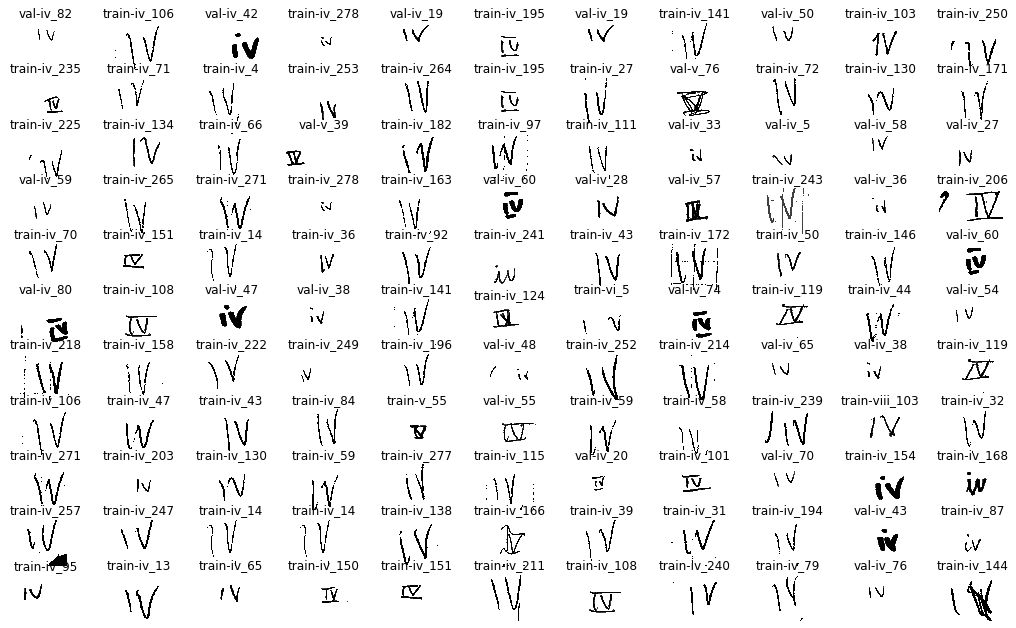

In [463]:
show_images('iv', 121)

In [464]:
delete_file('train', 'iv_33') # Chinese character 3
delete_file('train', 'iv_48') # Grey patches
delete_file('train', 'iv_53') # Chinese character 4
delete_file('train', 'iv_69')
delete_file('train', 'iv_116')
delete_file('train', 'iv_135')
delete_file('train', 'iv_167') # Scribble
delete_file('train', 'iv_181')
delete_file('train', 'iv_191') # IIII instead of IV
delete_file('train', 'iv_208') # Looks like IIV
delete_file('train', 'iv_219')
delete_file('train', 'iv_239') # Looks like IIV
delete_file('train', 'iv_266')
# delete_file('', '')

Successfully deleted data/1_clean/train/iv/iv_239.png


In [461]:
move_file('train', 'iv_2', 'ii')
move_file('train', 'iv_5', 'x')
move_file('train', 'iv_18', 'iii')
move_file('train', 'iv_29', 'ix')
move_file('train', 'iv_37', 'v')
move_file('train', 'iv_63', 'ix')
move_file('train', 'iv_67', 'ii')
move_file('train', 'iv_78', 'iii')
move_file('train', 'iv_80', 'v')
move_file('train', 'iv_123', 'iii')
move_file('train', 'iv_153', 'ii')
move_file('train', 'iv_244', 'iii')
move_file('train', 'iv_254', 'ii')
move_file('train', 'iv_275', 'iii')
move_file('val', 'iv_6', 'ii')
# move_file('', '', '')

Successfully moved data/1_clean/train/iv/iv_18.png


___
#### Label v

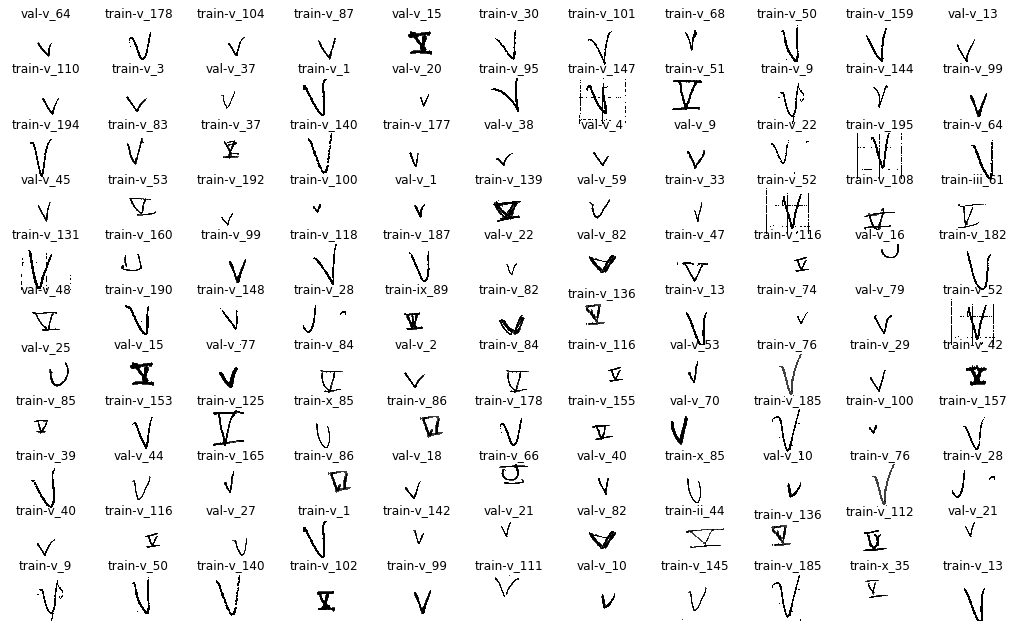

In [465]:
show_images('v', 121)

In [466]:
delete_file('train', 'v_28') # Unclear
delete_file('train', 'v_32')
delete_file('train', 'v_43') # Chinese char for Five
delete_file('train', 'v_44')
delete_file('train', 'v_80')
delete_file('train', 'v_93')
delete_file('train', 'v_109') # Looks more like smiley face
delete_file('train', 'v_119') # Heart shape
delete_file('train', 'v_160')
delete_file('train', 'v_176')
delete_file('val', 'v_25') # Looks like U
# delete_file('', '')

Successfully deleted data/1_clean/train/v/v_28.png
Successfully deleted data/1_clean/train/v/v_160.png
Successfully deleted data/1_clean/val/v/v_25.png


In [431]:
move_file('train', 'v_12', 'x')
move_file('train', 'v_17', 'ii')
move_file('train', 'v_18', 'vi')
move_file('train', 'v_19', 'ii')
move_file('train', 'v_54', 'x')
move_file('train', 'v_55', 'iv')
move_file('train', 'v_61', 'vi')
move_file('train', 'v_62', 'ii')
move_file('train', 'v_63', 'vi')
move_file('train', 'v_79', 'x')
move_file('train', 'v_91', 'x')
move_file('train', 'v_122', 'ii')
move_file('train', 'v_132', 'iv')
move_file('train', 'v_133', 'x')
move_file('train', 'v_135', 'x')
move_file('train', 'v_143', 'ii')
move_file('train', 'v_170', 'vi')
move_file('train', 'v_180', 'vi')
move_file('train', 'v_183', 'ii')
move_file('train', 'v_184', 'vi')
move_file('train', 'v_188', 'vi')
move_file('val', 'v_24', 'ii')
move_file('val', 'v_28', 'iv')
move_file('val', 'v_39', 'iv')
move_file('val', 'v_74', 'ii')
move_file('val', 'v_76', 'iv')
# move_file('', '', '')

___
#### Label vi

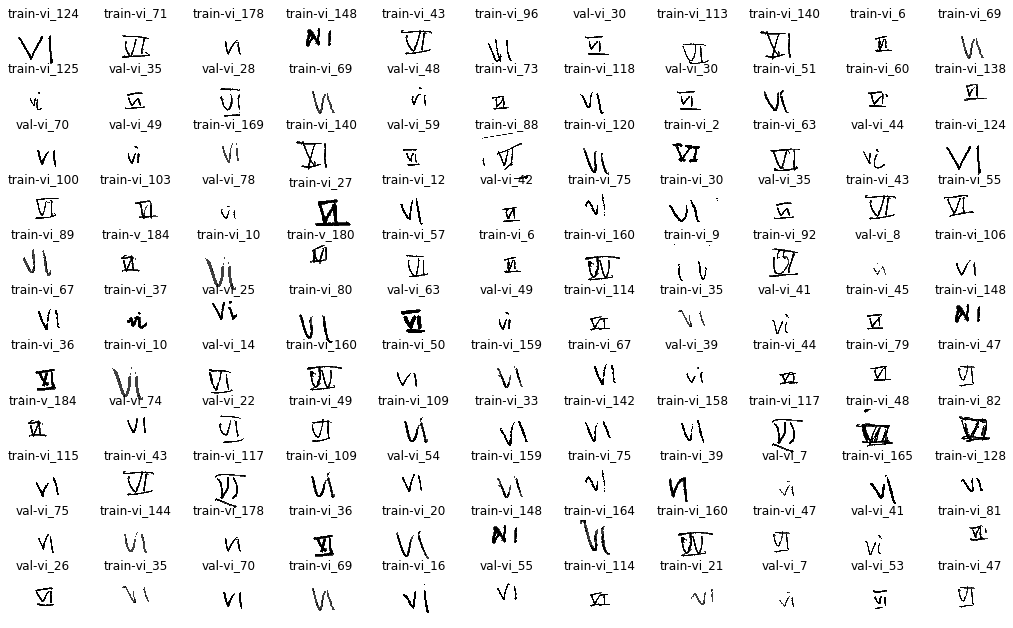

In [369]:
show_images('vi', 121)

In [467]:
delete_file('train', 'vi_0') # Looks very much like XI
delete_file('train', 'vi_23') # Black patch
delete_file('train', 'vi_29') # Smiley face
delete_file('train', 'vi_39') # Looks like N
delete_file('train', 'vi_143') # Looks very much like XI
delete_file('train', 'vi_148') # Looks like NI
delete_file('train', 'vi_160') # Looks like W
delete_file('train', 'vi_162') # Chinese character
delete_file('train', 'vi_171') # Unclear
delete_file('train', 'vi_172') # Scribble
delete_file('train', 'vi_173') # Unclear, too few pixels
delete_file('train', 'vi_180') # Scribble, unclear
# delete_file('', '')

Successfully deleted data/1_clean/train/vi/vi_39.png
Successfully deleted data/1_clean/train/vi/vi_148.png
Successfully deleted data/1_clean/train/vi/vi_160.png


In [429]:
move_file('train', 'vi_4', 'ii')
move_file('train', 'vi_5', 'iv')
move_file('train', 'vi_18', 'x')
move_file('train', 'vi_26', 'iv')
move_file('train', 'vi_149', 'x')
move_file('train', 'vi_151', 'x')
move_file('train', 'vi_166', 'iv')
move_file('train', 'vi_179', 'ii')
move_file('val', 'vi_32', 'iv')
move_file('val', 'vi_46', 'iii')
move_file('val', 'vi_52', 'iii')
move_file('val', 'vi_60', 'ii')
# move_file('', '', '')

___
#### Label vii

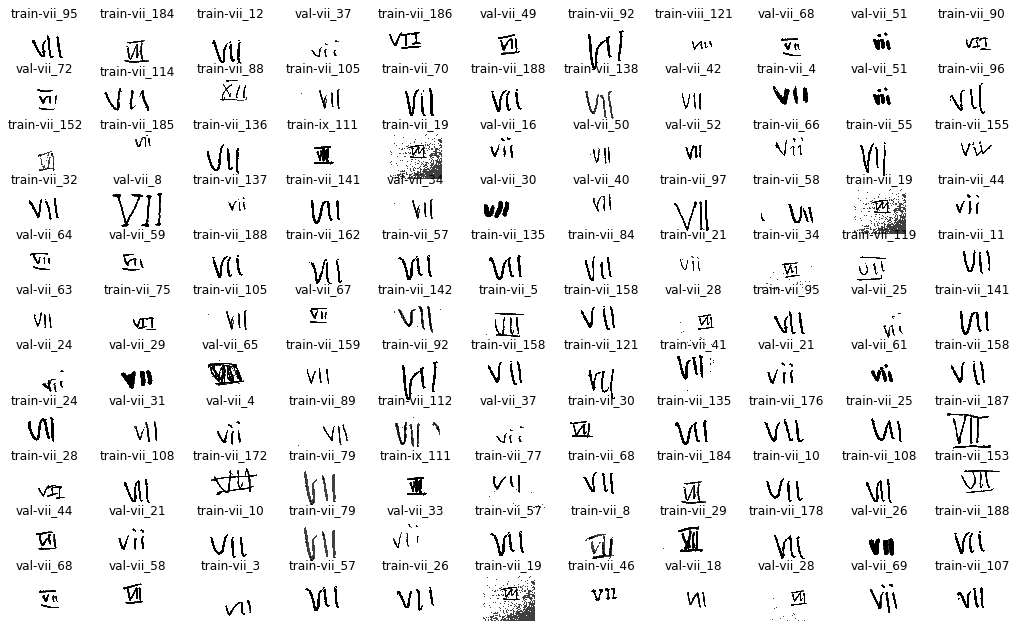

In [470]:
show_images('vii', 121)

In [472]:
delete_file('train', 'vii_19') # Pixels unclear
delete_file('train', 'vii_48') # Looks like XII
delete_file('train', 'vii_52') # Scribble
delete_file('train', 'vii_54') # Looks like XII
delete_file('train', 'vii_74') # Letter t
delete_file('train', 'vii_81') # Heart shape
delete_file('train', 'vii_83') # Scribble
delete_file('train', 'vii_88') # Looks like XII
delete_file('train', 'vii_94') # Smiley face
delete_file('train', 'vii_104') # Scribble
delete_file('train', 'vii_129') # Odd shape
delete_file('train', 'vii_131') # Looks like it has X
delete_file('train', 'vii_144') # Looks like it has X
delete_file('train', 'vii_147') # Smiley face
delete_file('train', 'vii_173') # Unclear
delete_file('train', 'vii_191') # Smiley face
delete_file('val', 'vii_47') # Looks like it has X
# delete_file('', '')

Successfully deleted data/1_clean/train/vii/vii_88.png


In [428]:
move_file('train', 'vii_65', 'iii')
move_file('train', 'vii_85', 'iv')
move_file('train', 'vii_128', 'vi')
# move_file('', '', '')

___
#### Label viii

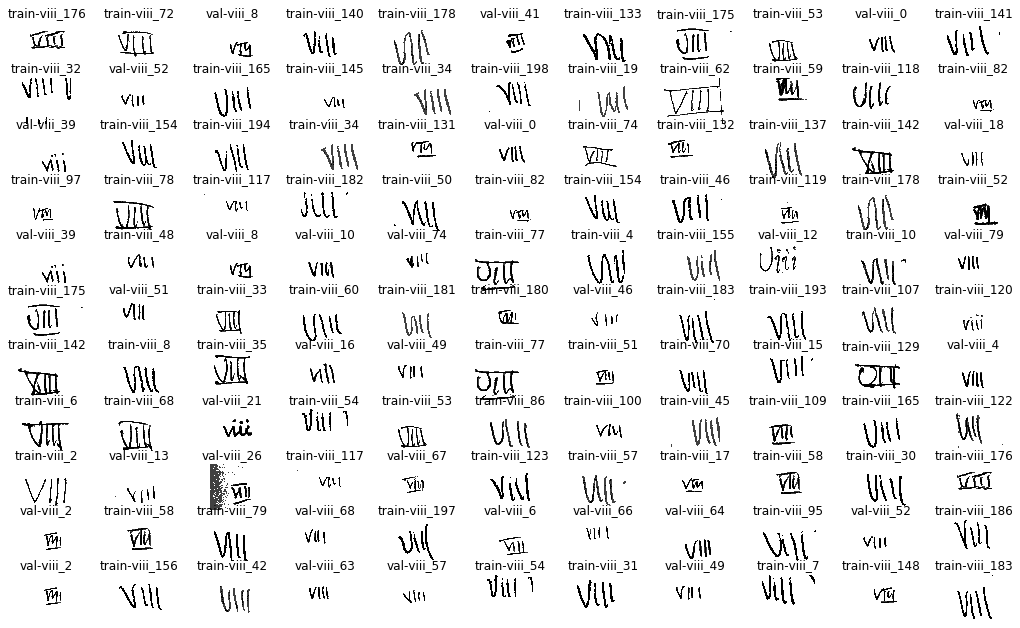

In [473]:
show_images('viii', 121)

In [427]:
delete_file('train', 'viii_24') # Scribble, unclear
delete_file('train', 'viii_25') # Scribble, unclear
delete_file('train', 'viii_47') # Scribbled small blobs
delete_file('train', 'viii_69') # Star shape
delete_file('train', 'viii_80') # Unclear
delete_file('train', 'viii_84') # Unclear
delete_file('train', 'viii_124') # Random small blobs
delete_file('train', 'viii_130') # Chinese character eight
delete_file('train', 'viii_146') # Unclear
delete_file('train', 'viii_150') # Smiley face
delete_file('train', 'viii_159') # 5 vertical lines
delete_file('train', 'viii_171') # Scribble, unclear
delete_file('train', 'viii_173') # Scribble
delete_file('train', 'viii_195') # 5 vertical lines
delete_file('train', 'viii_196') # Looks like III VI
delete_file('val', 'viii_47') # Scribble
# delete_file('', '')

In [426]:
move_file('train', 'viii_12', 'ix')
move_file('train', 'viii_13', 'ii')
move_file('train', 'viii_22', 'vii')
move_file('train', 'viii_39', 'iii')
move_file('train', 'viii_66', 'iv')
move_file('train', 'viii_87', 'ix')
move_file('train', 'viii_103', 'iv')
move_file('train', 'viii_121', 'vii')
move_file('train', 'viii_158', 'iv')
move_file('train', 'viii_188', 'ii')
move_file('train', 'viii_105', 'ix')
# move_file('', '', '')

___
#### Label ix

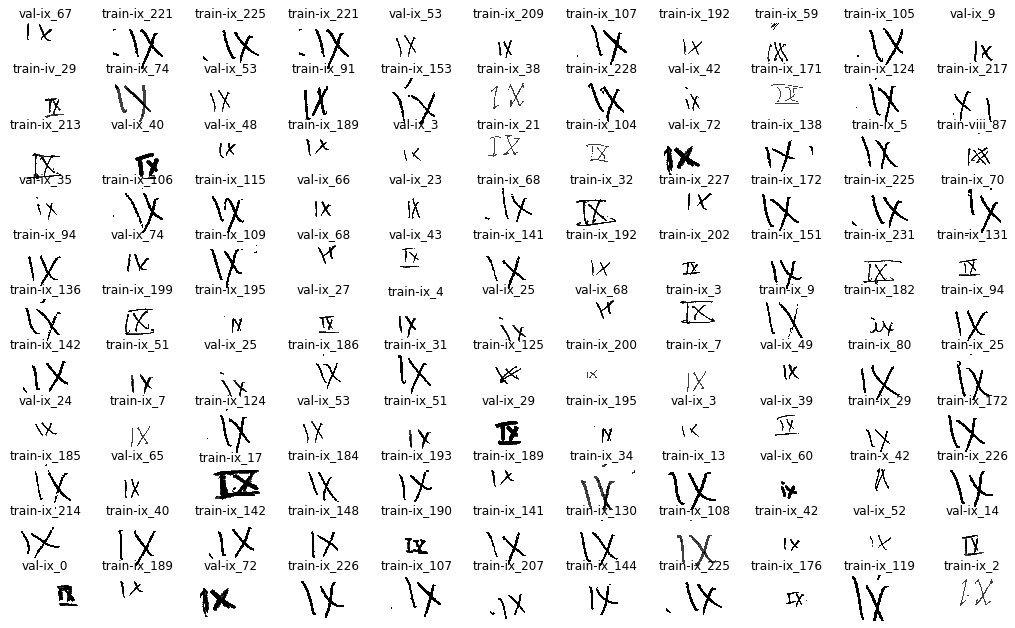

In [403]:
show_images('ix', 121)

In [474]:
delete_file('train', 'ix_6') # Circle shape
delete_file('train', 'ix_16') # Unclear (looks like X I)
delete_file('train', 'ix_41') # Scribble
delete_file('train', 'x_42') # Unclear
delete_file('train', 'ix_64') # Unclear
delete_file('train', 'ix_79') # Circle shape
delete_file('train', 'ix_99') # Chinese character 9
delete_file('train', 'ix_117') # Scribble
delete_file('train', 'ix_125') # Unclear
delete_file('train', 'ix_135') # Scribble
delete_file('train', 'ix_143') # Scribble
delete_file('train', 'ix_146') # Unclear (looks like X I)
delete_file('train', 'ix_149') # Scribble
delete_file('train', 'ix_157') # Unclear
delete_file('train', 'ix_158') # Scribble
delete_file('train', 'ix_159') # Unclear, looks like I X I
delete_file('train', 'ix_162') # looks like X I
delete_file('train', 'ix_175') # unclear
delete_file('train', 'ix_194') # Unclear (looks like X I)
delete_file('train', 'ix_203') # Looks like XI
delete_file('train', 'ix_224') # unclear
delete_file('val', 'ix_2') # Blob of pixels
# delete_file('', '')

In [424]:
move_file('train', 'ix_1', 'ii')
move_file('train', 'ix_61', 'vii')
move_file('train', 'ix_84', 'ii')
move_file('train', 'ix_89', 'v')
move_file('train', 'ix_96', 'iv')
move_file('train', 'ix_111', 'vii')
move_file('train', 'ix_180', 'x')
move_file('train', 'ix_191', 'i')
move_file('train', 'ix_197', 'x')
move_file('train', 'ix_204', 'iv')
move_file('train', 'ix_219', 'iv')
move_file('val', 'ix_7', 'iv')
# move_file('', '', '')

___
#### Label x

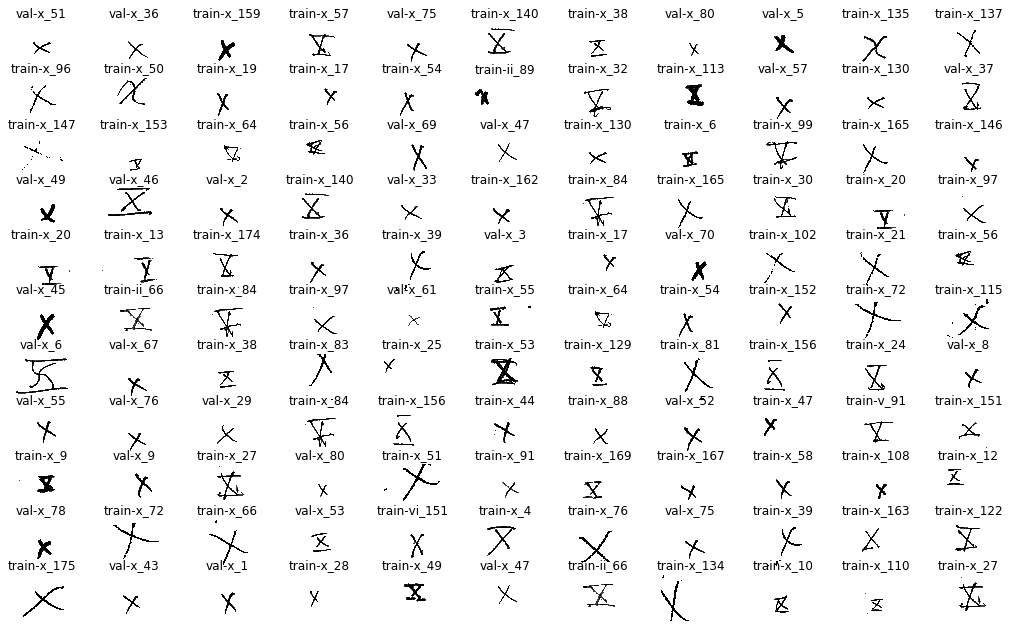

In [423]:
show_images('x', 121)

In [475]:
delete_file('train', 'x_31') # Scribble
delete_file('train', 'x_46') # Scribble
delete_file('train', 'x_77') # Scribble
delete_file('train', 'x_80') # Scribble
delete_file('train', 'x_92') # Scribble
delete_file('train', 'x_94') # Scribble
delete_file('train', 'x_111') # Unclear blobs
delete_file('train', 'x_138') # English word 'ten'
delete_file('train', 'x_139') # Unclear, too few pixels
delete_file('train', 'x_149') # Chinese character 10
delete_file('train', 'x_153') # Unclear
delete_file('train', 'x_178') # Unclear, too few pixels
# delete_file('', '')

Successfully deleted data/1_clean/train/x/x_153.png


In [443]:
move_file('train', 'x_7', 'v')
move_file('train', 'x_35', 'v')
move_file('train', 'x_42', 'ix')
move_file('train', 'x_64', 'v')
move_file('train', 'x_85', 'v')
move_file('train', 'x_157', 'ii')
move_file('val', 'x_56', 'v')
# move_file('', '', '')

In [482]:
# Export list of deleted images
today = dt.today().strftime('%Y%m%d')

# with open(f'deleted_images_list_{today}.txt', 'w') as filehandle:
#     json.dump(deleted_imgs, filehandle)

# Read deleted images list
# with open(f'deleted_images_list_{today}.txt', 'r') as filehandle:
#     deleted_imgs = json.load(filehandle)